In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Pandas DataFrame
import pandas as pd
demo = pd.read_csv("UCI_Credit_Card.csv")
demo.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
demo = demo.drop('ID',axis=1)
demo = demo.drop('SEX',axis=1)
demo = demo.drop('EDUCATION',axis=1)
demo = demo.drop('MARRIAGE',axis=1)
demo.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<AxesSubplot:xlabel='LIMIT_BAL'>

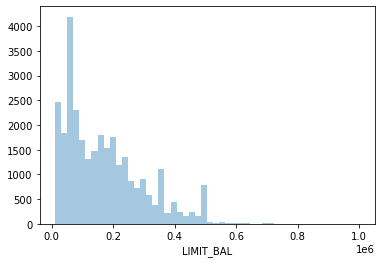

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.distplot(demo['LIMIT_BAL'],kde=False)

<AxesSubplot:xlabel='BILL_AMT6'>

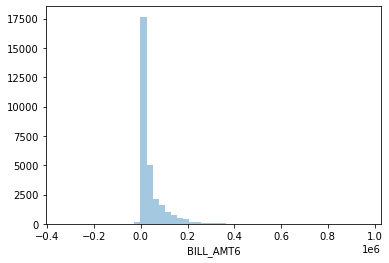

In [6]:
sns.distplot(demo['BILL_AMT6'],kde=False)

In [7]:
demo[demo['BILL_AMT6'] == -339603.000000]

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
290,280000.0,33,-1,-1,-1,-1,-1,-1,898.0,898.0,...,898.0,325.0,-339603.0,898.0,325.0,898.0,325.0,0.0,345293.0,1


In [8]:
demo.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<AxesSubplot:>

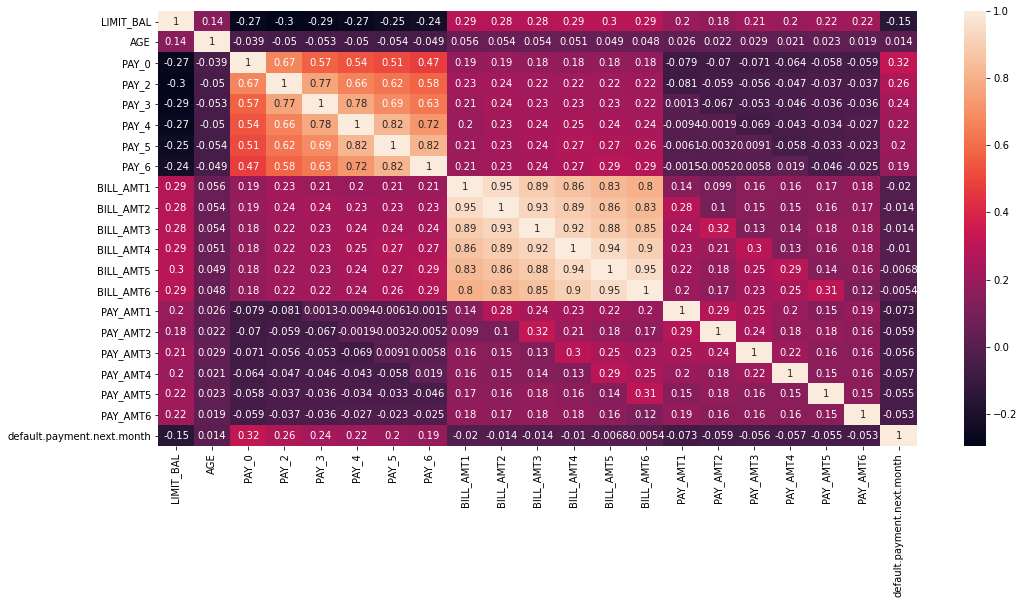

In [9]:
plt.figure(figsize=(17,8))
sns.heatmap(demo.corr(),annot=True)

0.992866960519544


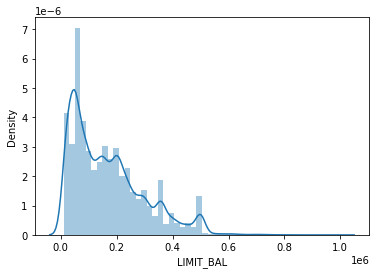

In [12]:
import numpy as np
sns.distplot((demo['LIMIT_BAL']),kde=True)
print(demo['LIMIT_BAL'].skew())

-0.6713816853908205


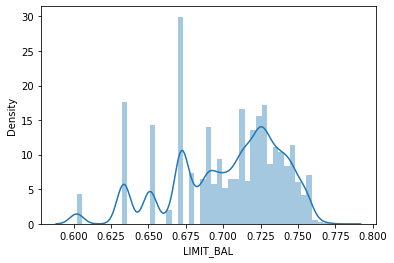

In [19]:
import numpy as np
sns.distplot((np.log10(np.log10(demo['LIMIT_BAL']))),kde=True)
print(np.log10(np.log10(demo['LIMIT_BAL'])).skew())

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
powerdemo = pd.DataFrame(pt.fit_transform(demo))
powerdemo.columns = demo.columns

In [22]:
powerdemo.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.665383,-1.505599,1.662431,1.615503,-0.683908,-0.653252,-1.761424,-1.700769,-0.654786,-0.666975,...,-0.708335,-0.705134,-0.656065,-1.724472,-0.347889,-1.629996,-1.578070,-1.556978,-1.515825,1.876378
1,-0.090364,-1.134225,-0.889837,1.615503,0.259846,0.305873,0.340968,1.785357,-0.679304,-0.700056,...,-0.624273,-0.604623,-0.580055,-1.724472,-0.202757,-0.080144,0.009080,-1.556978,0.332020,1.876378
2,-0.396704,0.016042,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,-0.239392,-0.451718,...,-0.405640,-0.358103,-0.343748,-0.064485,-0.031718,-0.080144,0.009080,0.018806,0.741487,-0.532942
3,-0.953920,0.349978,0.099856,0.234774,0.259846,0.305873,0.340968,0.360884,0.017236,0.089416,...,-0.161996,-0.098021,-0.097838,0.063555,0.102920,-0.006222,0.046787,0.044891,0.059121,-0.532942
4,-0.953920,1.862737,-0.889837,0.234774,-0.683908,0.305873,0.340968,0.360884,-0.568415,-0.611116,...,-0.287765,-0.277290,-0.279323,0.063555,1.948535,1.066641,1.057406,-0.121440,-0.080835,-0.532942


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

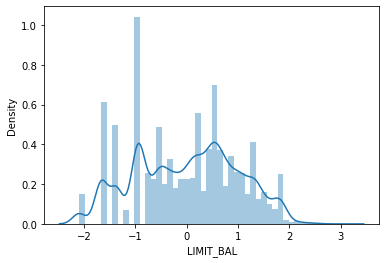

In [24]:
sns.distplot(powerdemo['LIMIT_BAL'])

In [11]:
demo['LIMIT_BAL'].skew()

0.992866960519544

In [12]:
(demo['LIMIT_BAL']**0.333).skew()

0.026048529327782746

In [13]:
#SciKit Learn
import pandas as pd
demo = pd.read_csv("UCI_Credit_Card.csv")
demo = demo.drop('ID',axis=1)
demo = demo.drop('SEX',axis=1)
demo = demo.drop('EDUCATION',axis=1)
demo = demo.drop('MARRIAGE',axis=1)
from sklearn.model_selection import train_test_split
X = demo.drop('default.payment.next.month',axis=1)
y = demo['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
#Model Building
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pipe = Pipeline((
("pt", PowerTransformer()),  
("lr", LogisticRegression()),
))
from sklearn.model_selection import cross_val_score
scoresdt = cross_val_score(pipe,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))

[0.80375    0.79625    0.8075     0.80958333 0.79833333 0.805
 0.80041667 0.80041667 0.80208333 0.80083333]
Average R2
0.8024166666666666
SD of accuracy
0.003885514408958254


In [14]:
#SciKit Learn
import pandas as pd
demo = pd.read_csv("UCI_Credit_Card.csv")
demo = demo.drop('ID',axis=1)
demo = demo.drop('SEX',axis=1)
demo = demo.drop('EDUCATION',axis=1)
demo = demo.drop('MARRIAGE',axis=1)
from sklearn.model_selection import train_test_split
X = demo.drop('default.payment.next.month',axis=1)
y = demo['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
#Model Building
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
pipe = Pipeline((
("pt", PowerTransformer()),
("lr", DecisionTreeClassifier(max_depth=10)),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.8065
Training Accuracy
0.84875


In [21]:
#SciKit Learn
import pandas as pd
demo = pd.read_csv("UCI_Credit_Card.csv")
demo = demo.drop('ID',axis=1)
demo = demo.drop('SEX',axis=1)
demo = demo.drop('EDUCATION',axis=1)
demo = demo.drop('MARRIAGE',axis=1)
from sklearn.model_selection import train_test_split
X = demo.drop('default.payment.next.month',axis=1)
y = demo['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=40)
#Model Building
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline((
("pt", PowerTransformer()),
("lr", RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.8085
Training Accuracy
0.9007916666666667


In [13]:
#SciKit Learn
import pandas as pd
demo = pd.read_csv("UCI_Credit_Card.csv")
demo = demo.drop('ID',axis=1)
demo = demo.drop('SEX',axis=1)
demo = demo.drop('EDUCATION',axis=1)
demo = demo.drop('MARRIAGE',axis=1)
from sklearn.model_selection import train_test_split
X = demo.drop('default.payment.next.month',axis=1)
y = demo['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
#Model Building
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline((
("pt", PowerTransformer()),
("lr", GradientBoostingClassifier(n_estimators=400)),
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))

Testing Accuracy
0.8201666666666667
Training Accuracy
0.8373333333333334


In [14]:
pipe.predict_proba(X_test)

array([[0.68772067, 0.31227933],
       [0.38172102, 0.61827898],
       [0.63775319, 0.36224681],
       ...,
       [0.80806446, 0.19193554],
       [0.96624462, 0.03375538],
       [0.93267537, 0.06732463]])

In [15]:
pipe.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
predicted = pipe.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[4410  253]
 [ 826  511]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.67      0.38      0.49      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [18]:
recall_score(y_test,predicted)

0.38219895287958117

Automatically created module for IPython interactive environment


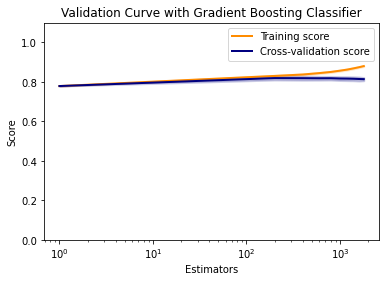

In [23]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

param_range = np.arange(1,2000,200)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y,cv=5, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gradient Boosting Classifier")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


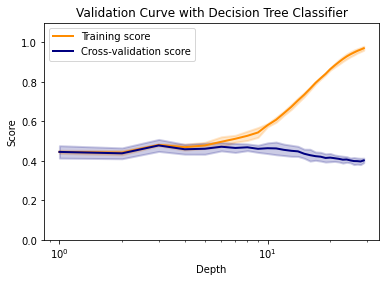

In [26]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
param_range = np.arange(1,30,1)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y,cv=5, param_name="max_depth", param_range=param_range,
    scoring="f1", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment


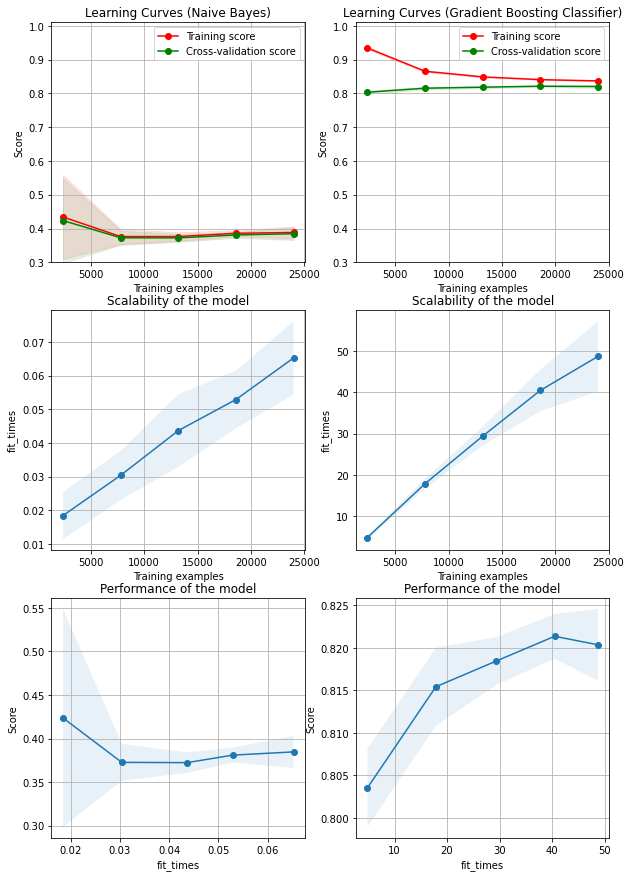

In [29]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    I have Generated 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves (Gradient Boosting Classifier)"
# GBC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(n_estimators=400)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()